In [ ]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import shapely.geometry
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

pio.renderers.default = 'colab'
pio.templates.default = "presentation"


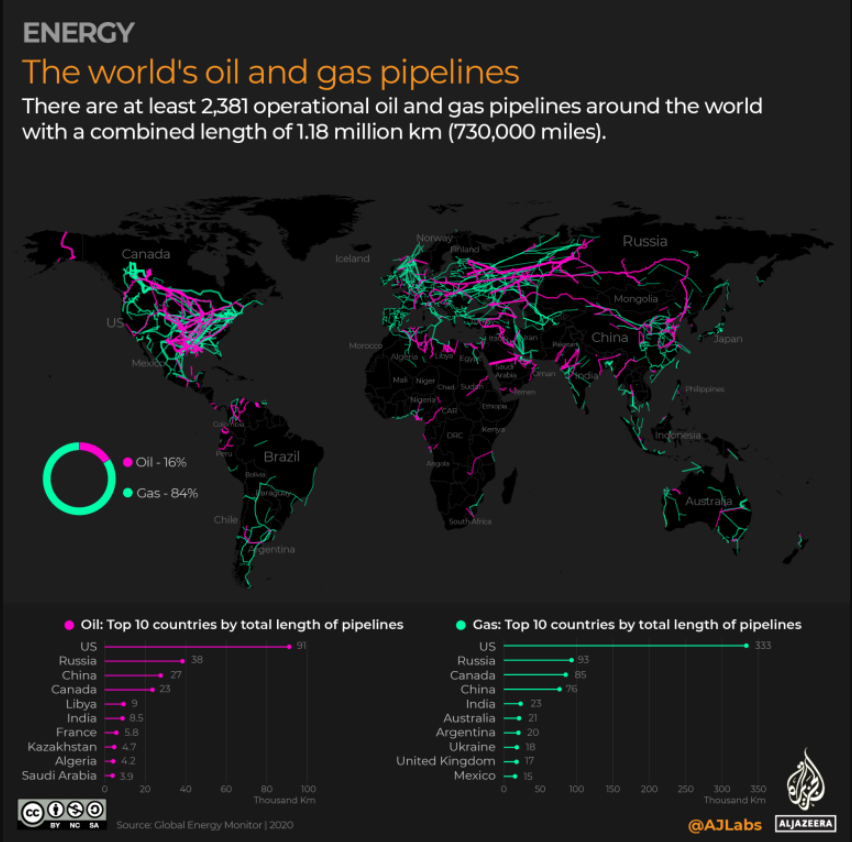

In [ ]:
file = 'data/countries.geojson'
import json
with open(file) as f:
    j  = json.load(f)

In [ ]:
lng_file = 'data/GGIT-LNG-Terminals-June-2021.xlsx'
lng_df = pd.read_excel(lng_file)


In [ ]:
lng_df.head()

In [ ]:
# clean data
clean_lng_df = lng_df.drop(lng_df[lng_df['CapacityInMtpa']=='--'].index)
clean_lng_df['CapacityInMtpa'] = pd.to_numeric(clean_lng_df['CapacityInMtpa'])
lng_df_sum = clean_lng_df.groupby('Country').agg({'CapacityInMtpa':'sum','Latitude':'first','Longitude':'first'}).reset_index()
lng_top_10_length = lng_df_sum.sort_values('CapacityInMtpa',ascending=True).iloc[-10:,:]

# plot
fig = go.Figure()
lng_top_10_length['color'] = ['gold' if c == 'Russia' else 'deeppink' for c in lng_top_10_length['Country'].to_list() ]
# add bar 
fig.add_trace(go.Bar(x=lng_top_10_length['CapacityInMtpa'],y=lng_top_10_length['Country'],orientation='h',marker=dict(color=lng_top_10_length['color'])))
# add dot scatter
fig.add_trace(go.Scatter(x=lng_top_10_length['CapacityInMtpa'],y=lng_top_10_length['Country'],orientation='h',marker=dict(color=lng_top_10_length['color']),mode="markers"))

# adjust the detail
fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    
    title=dict(text='LNG capacity of each country (top10)',
         font_size= 14,
        font_color='silver'),
    xaxis=dict(
        title='capacity/ Mtpa',
        titlefont_color='silver',
        titlefont_size=12,
        tickfont_size=10,
        tickfont_color='silver'
    ),
    yaxis=dict(
        title=' ',
        titlefont_size=12,
        tickfont_size=10,
        tickfont_color='silver'
    ),
    bargap=0.9, # gap between bars of adjacent location coordinates.
    height= 400,
    showlegend=False
)
fig.show()


In [ ]:
lng_df_region_sum = clean_lng_df.groupby(['Region','Country']).agg({'CapacityInMtpa':'sum','Latitude':'first','Longitude':'first'}).reset_index()

lng_df_region_sum_top = lng_df_region_sum.sort_values('CapacityInMtpa',ascending=True).iloc[-20:,:]


fig = px.sunburst(lng_df_region_sum_top, path=['Region', 'Country'], values='CapacityInMtpa')
fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    title = 'LNG capacity in region',
)
fig.show()

In [ ]:
fig=  go.Figure()

lng_df_region_sum_top['Country'].replace({'USA':'United States of America'},inplace=True)

trace1 = go.Choroplethmapbox(locations=lng_df_region_sum_top.Country, z=lng_df_region_sum_top.CapacityInMtpa,geojson= j,featureidkey="properties.ADMIN",colorscale="sunsetdark")

fig.add_trace(trace1)
fig.update_layout(    #paper_bgcolor='black',
    title='LNG capacity',
    #plot_bgcolor='black',
                  mapbox_style="carto-darkmatter",mapbox_zoom=1,showlegend=False,height=800,width=1200)

fig.show()

In [ ]:
file = 'data/GGIT-Gas-Pipelines-January-2022.xlsx'
df = pd.read_excel(file)

In [ ]:
df.head()

In [ ]:
clean_df = df.drop(df[(df['WKTFormat']=='--') | (df['LengthEstimateKm']=='--') | (df['CapacityBcm/y']=='--')].index)
df_sum = clean_df.groupby('StartCountry').agg({'LengthEstimateKm':'sum','CapacityBcm/y':'sum'}).reset_index()

In [ ]:
top_10_length = df_sum.sort_values('LengthEstimateKm',ascending=True).iloc[-10:,:]
fig = go.Figure()
top_10_length['color'] = ['gold' if c == 'Russia' else 'deeppink' for c in top_10_length['StartCountry'].to_list() ]
fig.add_trace(go.Bar(x=top_10_length['LengthEstimateKm'],y=top_10_length['StartCountry'],orientation='h',marker=dict(color=top_10_length['color'])))
fig.add_trace(go.Scatter(x=top_10_length['LengthEstimateKm'],y=top_10_length['StartCountry'],orientation='h',marker=dict(color=top_10_length['color']),mode="markers"))


fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    
    title=dict(text='Pipe length of each country (top10)',
         font_size= 14,
        font_color='silver'),
    xaxis=dict(
        title='Pipe Length/ Km',
        titlefont_color='silver',
        titlefont_size=12,
        tickfont_size=10,
        tickfont_color='silver'
    ),
    yaxis=dict(
        title=' ',
        titlefont_size=12,
        tickfont_size=10,
        tickfont_color='silver'
    ),
    bargap=0.9, # gap between bars of adjacent location coordinates.
    height= 400,
    showlegend=False
)
fig.show()

In [ ]:
top_10_length = df_sum.sort_values('LengthEstimateKm',ascending=True).iloc[-10:,:]
fig = go.Figure()
top_10_length['color'] = ['gold' if c == 'Russia' else 'deeppink' for c in top_10_length['StartCountry'].to_list() ]
fig.add_trace(go.Pie(values=top_10_length['LengthEstimateKm'],labels=top_10_length['StartCountry'],hole=0.8,textinfo='label'))


fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    
    title=dict(text='Pipe length of each country (top10)',
         font_size= 14,
        font_color='silver'),
    xaxis=dict(
        title='Pipe Length/ Km',
        titlefont_color='silver',
        titlefont_size=12,
        tickfont_size=10,
        tickfont_color='silver'
    ),
    yaxis=dict(
        title=' ',
        titlefont_size=12,
        tickfont_size=10,
        tickfont_color='silver'
    ),
    bargap=0.9, # gap between bars of adjacent location coordinates.
    height= 400,
    showlegend=False
)
fig.show()

In [ ]:
top_10_capicity = df_sum.sort_values('CapacityBcm/y',ascending=True).iloc[-10:,:]
fig = go.Figure()
top_10_capicity['color'] = ['gold' if c == 'Russia' else 'deeppink' for c in top_10_capicity['StartCountry'].to_list() ]
fig.add_trace(go.Bar(x=top_10_capicity['CapacityBcm/y'],y=top_10_capicity['StartCountry'],orientation='h',marker=dict(color=top_10_capicity['color'])))
fig.add_trace(go.Scatter(x=top_10_capicity['CapacityBcm/y'],y=top_10_capicity['StartCountry'],orientation='h',marker=dict(color=top_10_capicity['color']),mode="markers"))


fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    
    title=dict(text='Capacity of each country (top10)',
         font_size= 14,
        font_color='silver'),
    xaxis=dict(
        title='Pipe Length/ Km',
        titlefont_color='silver',
        titlefont_size=12,
        tickfont_size=10,
        tickfont_color='silver'
    ),
    yaxis=dict(
        title=' ',
        titlefont_size=12,
        tickfont_size=10,
        tickfont_color='silver'
    ),
    bargap=0.9, # gap between bars of adjacent location coordinates.
    height= 400,
    showlegend=False
)
fig.show()

In [ ]:
import geopandas
from shapely.geometry import LineString

In [ ]:
geo_df = geopandas.GeoDataFrame(df)
print(geo_df.shape)
geo_df = geo_df.drop(geo_df[(geo_df['WKTFormat']=='--')].index)
print(geo_df.shape)

In [ ]:
top_10_geo_df = geo_df[geo_df['StartCountry'].isin(top_10_length['StartCountry'].to_list())]

In [ ]:
def convert_linestr_to_linestr(s):
    cc= s.lstrip('LINESTRING (').rstrip(')').split(",")
    cc[0] = " "+cc[0]
    ccc = pd.DataFrame(cc)[0].str.split(' ',expand=True)
    ls = shapely.geometry.linestring.LineString(list(ccc[[1,2]].astype(float).to_records(index=False)))
    return ls

linestring_df =top_10_geo_df[~top_10_geo_df.WKTFormat.str.contains('MULTILINESTRING')].copy()
linestring_df['ls'] = linestring_df.WKTFormat.apply(convert_linestr_to_linestr)
linestring_df.head()

In [ ]:
lats = []
lons = []
names = []
colors = []
for feature, name,startcountry,pipe in zip(linestring_df.ls, linestring_df.Countries,linestring_df.StartCountry,linestring_df.PipelineName):
    if isinstance(feature, shapely.geometry.linestring.LineString):
        linestrings = [feature]
    elif isinstance(feature, shapely.geometry.multilinestring.MultiLineString):
        linestrings = feature.geoms
    else:
        continue
    for linestring in linestrings:
        x, y = linestring.xy
        lats = np.append(lats, y)
        lons = np.append(lons, x)
        colors = np.append(colors,[startcountry]*len(y))
        names = np.append(names, [name+'*'+pipe]*len(y))
        lats = np.append(lats, None)
        lons = np.append(lons, None)
        names = np.append(names, None)
        colors = np.append(colors,startcountry)

fig = px.line_mapbox(lat=lats, lon=lons, hover_name=names,color = colors,color_discrete_sequence=px.colors.qualitative.Safe,
                         mapbox_style="carto-darkmatter")
fig.update_layout(
    legend=dict(bgcolor='black',
    font = dict(size=12,color='silver'),
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01),mapbox_zoom=1,showlegend=True,height=800,width=1200,mapbox_center = dict(lat=40.46,lon=3.7))
fig.show()

# Plot on GeoMap 

In [ ]:
lats = []
lons = []
names = []
colors = []
for feature, name,startcountry,pipe in zip(linestring_df.ls, linestring_df.Countries,linestring_df.StartCountry,linestring_df.PipelineName):
    if isinstance(feature, shapely.geometry.linestring.LineString):
        linestrings = [feature]
    elif isinstance(feature, shapely.geometry.multilinestring.MultiLineString):
        linestrings = feature.geoms
    else:
        continue
    for linestring in linestrings:
        x, y = linestring.xy
        lats = np.append(lats, y)
        lons = np.append(lons, x)
        colors = np.append(colors,[startcountry]*len(y))
        names = np.append(names, [name+'*'+pipe]*len(y))
        lats = np.append(lats, None)
        lons = np.append(lons, None)
        names = np.append(names, None)
        colors = np.append(colors,startcountry)
        
fig=  go.Figure(go.Choropleth(locations=top_10_length.StartCountry, z=top_10_length.LengthEstimateKm,locationmode='country names'))
fig.add_scattergeo(mode='lines',lat=lats, lon=lons)
fig.update_layout(mapbox_zoom=1,showlegend=False)

fig.show()

In [ ]:
file = 'data/countries.geojson'
import json
with open(file) as f:
    j  = json.load(f)

In [ ]:
lats = []
lons = []
names = []
colors = []
color_maps = {}
top_10_length['StartCountry'].replace({'USA':'United States of America'},inplace=True)

for i,c in enumerate(top_10_length.StartCountry.to_list()):
    color_maps[c] = px.colors.qualitative.Safe[i]

for feature, name,startcountry,pipe in zip(linestring_df.ls, linestring_df.Countries,linestring_df.StartCountry,linestring_df.PipelineName):
    if isinstance(feature, shapely.geometry.linestring.LineString):
        linestrings = [feature]
    elif isinstance(feature, shapely.geometry.multilinestring.MultiLineString):
        linestrings = feature.geoms
    else:
        continue
    for linestring in linestrings:
        x, y = linestring.xy
        lats = np.append(lats, y)
        lons = np.append(lons, x)
        colors = np.append(colors,[color_maps.get(startcountry,px.colors.qualitative.Safe[-1])]*len(y))
        names = np.append(names, [name+'*'+pipe]*len(y))
        lats = np.append(lats, None)
        lons = np.append(lons, None)
        names = np.append(names, None)
        colors = np.append(colors,color_maps.get(startcountry,px.colors.qualitative.Safe[-1]))
fig=  go.Figure()


trace1 = go.Choroplethmapbox(locations=top_10_length.StartCountry, z=top_10_length.LengthEstimateKm,geojson= j,featureidkey="properties.ADMIN",colorscale="sunsetdark")
trace2 = go.Scattermapbox(mode='lines',lat=lats, lon=lons,
                          #marker=dict(color=colors),
                          line=dict(color='lime'))
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(    #paper_bgcolor='black',
    #plot_bgcolor='black',
                  mapbox_style="carto-darkmatter",mapbox_zoom=1,showlegend=False,height=800,width=1200)

fig.show()